In [133]:
file = open("test.txt","w")

In [134]:
import random
for i in range(1, 1000000):
    random_num = random.choice(num)
    file.write(str(random_num)+'\n')

In [135]:
file.close()

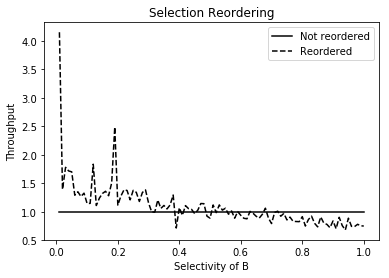

In [23]:
import matplotlib.pyplot as plt
import time
num = list()
for i in range(1, 101):
    num.append(i)
throughput = list()
selectivity = list()
ones = [1]*100
line = sc.textFile("test.txt")
line = line.map(lambda x:int(x))
for i in num:
    # do operation A first, then do operation B
    time_before_A = time.time()
    line_after_A = line.filter(lambda x: x % 2 == 0)    # operation A
    time_after_A = time.time()
    time_interval_A = time_after_A - time_before_A
 
    time_before_B = time.time()
    line_after_B = line_after_A.filter(lambda x: x <= i)   # operation B
    time_after_B = time.time()
    time_interval_B = time_after_B - time_before_B
    
    throughput_AB = 1/(time_interval_A + time_interval_B * 0.5)
    
    # do operation B first, then do operation A
    time_before_B = time.time()
    line_after_B = line.filter(lambda x: x <= i)    # operation B
    time_after_B = time.time()
    time_interval_B = time_after_B - time_before_B
   
    time_before_A = time.time()
    line_after_A = line_after_B.filter(lambda x: x % 2 == 0)  # operation A
    time_after_A = time.time()
    time_interval_A = time_after_A - time_before_A
    
    throughput_BA = 1/(time_interval_A + time_interval_B * float(i)/100)
    
    throughput.append(throughput_BA/throughput_AB)
    selectivity.append(float(i)/100)


plt.figure()
line_AB, = plt.plot(selectivity, ones, 'k', label='Not reordered')
line_BA, = plt.plot(selectivity, throughput , 'k--', label='Reordered')
plt.legend(handles=[line_AB, line_BA])
plt.xlabel('Selectivity of B')
plt.ylabel('Throughput')
plt.title('Selection Reordering')
plt.show()